# PART B: Logistic Regression

Shrey Sanjay Kekade  
x23194316@student.ncirl.ie

# Import Libraries

In [1]:
library(performanceEstimation) # To perform SMOTE
library(caret)                 # To split the data
library(pROC)                  # To plot ROC curve
library(ROSE)                  # To perform ROSE
library(ggplot2)               # To plot histograms
library(corrplot)              # To plot the correplot
library(dplyr)                 # To manipulate data
library(tidyr)                 # To create tidy data

Warning message:
"package 'performanceEstimation' was built under R version 4.3.3"
Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Loading required package: lattice

Warning message:
"package 'pROC' was built under R version 4.3.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Warning message:
"package 'ROSE' was built under R version 4.3.3"
Loaded ROSE 0.0-4


Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.92 loaded

Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under 

# Import Data

In [2]:
data <- read.csv('fraud.csv')

## Analyse Class Imbalance


     0      1 
283253    473 

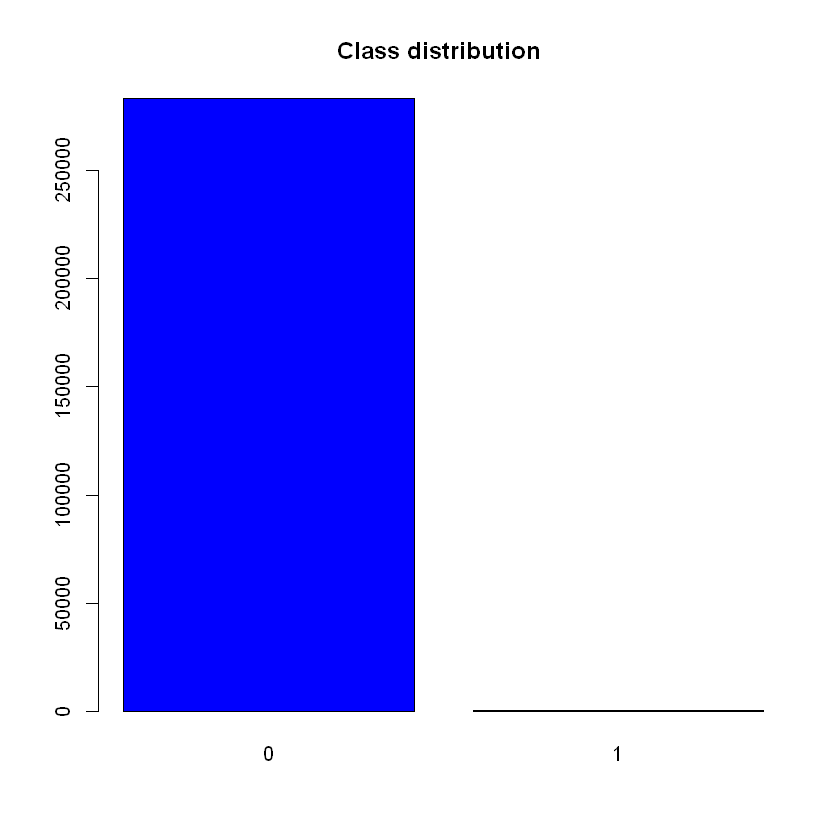

In [3]:
data$Class <- as.factor(data$Class)
table(data$Class)

# plot the class distribution
plot(data$Class, main='Class distribution ', col=c('blue', 'orange'))

In [4]:
data$Class<-as.factor(data$Class)
prop.table(table(data$Class))


          0           1 
0.998332899 0.001667101 

As we see the minority class number “1” is only about 0.166% of the total cases

In [5]:
summary(data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

# Histograms of variables

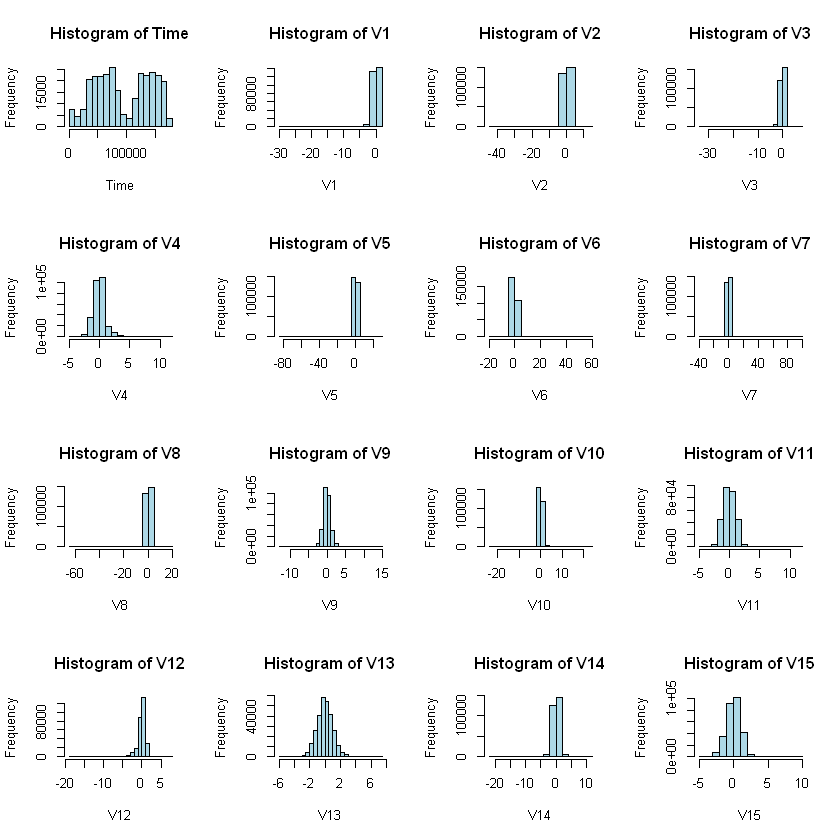

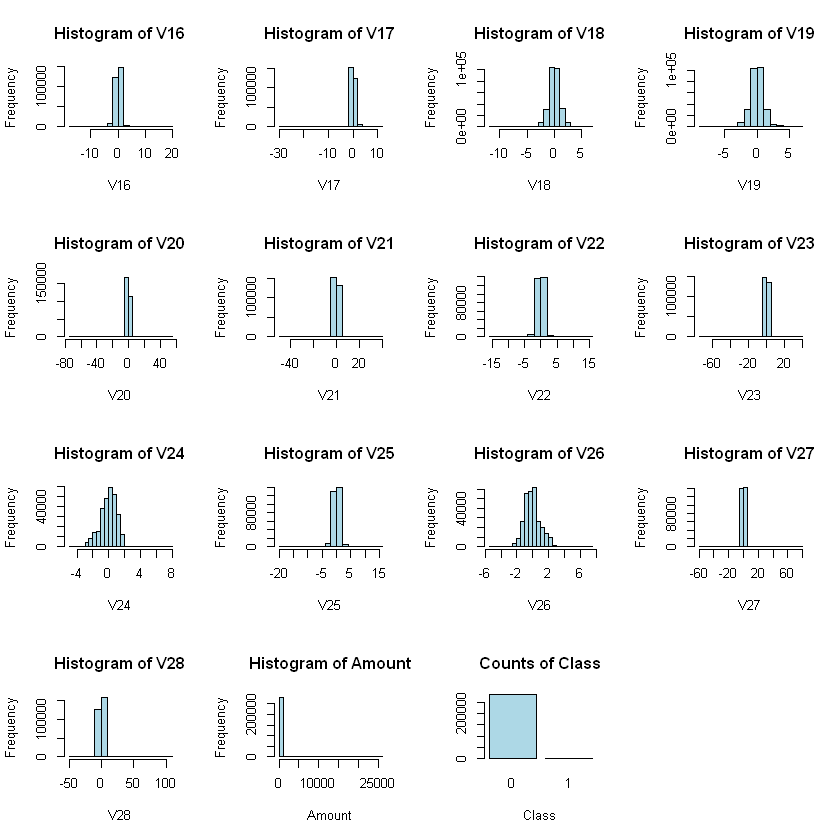

In [6]:
par(mfrow = c(4, 4))
# Loop through each column
for (col_name in names(data)) {
  if (col_name == "Class") {
    # Create a bar plot for the Class column
    class_counts <- table(data[[col_name]])
    barplot(class_counts, main = paste("Counts of", col_name), xlab = col_name, col = "lightblue", border = "black")
  } else {
    # Create a histogram for numeric columns
    if (is.numeric(data[[col_name]])) {
      hist(data[[col_name]], main = paste("Histogram of", col_name), xlab = col_name, col = "lightblue", border = "black")
    }
  }
}


## Correlation

In [7]:
# Select only numeric columns
numeric_columns <- sapply(data, is.numeric)
numeric_data <- data[, numeric_columns]

In [8]:
# Compute the correlation matrix
correlation_matrix <- cor(numeric_data)
correlation_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000000,0.1179266030,-0.0105555719,-4.220538e-01,-0.1058448928,1.732230e-01,-6.327934e-02,8.533518e-02,-3.820313e-02,-7.861473e-03,⋯,-5.102152e-02,0.0459126634,1.437273e-01,5.147407e-02,-1.595427e-02,-2.332616e-01,-4.181832e-02,-5.171416e-03,-9.304984e-03,-1.055883e-02
V1,0.117926603,1.0000000000,0.0068749355,-8.111812e-03,0.0022573276,-7.036016e-03,4.128357e-04,-9.173080e-03,-1.168269e-03,1.828040e-03,⋯,-1.392896e-03,0.0028175227,-1.436252e-03,-1.330430e-03,-7.230448e-04,-2.224914e-04,-6.836594e-04,-1.570619e-02,-4.860581e-03,-2.301053e-01
V2,-0.010555572,0.0068749355,1.0000000000,5.278252e-03,-0.0014952611,5.209894e-03,-5.944499e-04,7.424774e-03,2.899226e-03,-2.739687e-04,⋯,-1.287459e-03,-0.0048971648,1.237130e-03,-3.854664e-03,7.005669e-04,-1.569123e-03,2.532207e-04,7.554740e-03,1.611321e-03,-5.334280e-01
V3,-0.422053810,-0.0081118122,0.0052782517,1.000000e+00,0.0028287819,-6.878571e-03,-1.511482e-03,-1.172139e-02,-1.814670e-03,-3.578921e-03,⋯,-2.268501e-03,0.0034998716,-2.747377e-04,4.490740e-04,-7.219221e-05,4.251038e-04,-9.431455e-05,-7.050644e-03,-1.341624e-04,-2.124100e-01
V4,-0.105844893,0.0022573276,-0.0014952611,2.828782e-03,1.0000000000,1.744216e-03,-8.804138e-04,4.656984e-03,8.904924e-04,2.154400e-03,⋯,3.181437e-04,-0.0010337817,1.154014e-04,7.320911e-04,-1.198895e-04,1.616877e-04,7.769988e-04,1.321989e-03,2.310926e-04,9.951434e-02
V5,0.173223011,-0.0070360158,0.0052098935,-6.878571e-03,0.0017442162,1.000000e+00,-9.375118e-04,-8.708848e-03,1.430492e-03,-1.212831e-03,⋯,-1.184740e-03,0.0016223475,-5.587086e-04,1.183230e-03,1.978853e-04,6.905195e-05,3.904259e-04,-5.798027e-03,-8.200772e-04,-3.876853e-01
V6,-0.063279338,0.0004128357,-0.0005944499,-1.511482e-03,-0.0008804138,-9.375118e-04,1.000000e+00,4.363105e-04,3.035786e-03,-7.338978e-04,⋯,-1.810128e-04,-0.0021336821,1.103627e-03,-7.553723e-04,1.202149e-03,6.970064e-04,-2.803859e-05,2.892465e-04,9.246284e-04,2.163888e-01
V7,0.085335181,-0.0091730804,0.0074247740,-1.172139e-02,0.0046569837,-8.708848e-03,4.363105e-04,1.000000e+00,-6.419315e-03,-4.921428e-03,⋯,-1.192162e-03,0.0090101010,-2.280236e-03,3.303484e-03,-3.844088e-04,-7.247179e-05,6.238846e-04,-4.536867e-03,1.656569e-03,4.004080e-01
V8,-0.038203126,-0.0011682694,0.0028992257,-1.814670e-03,0.0008904924,1.430492e-03,3.035786e-03,-6.419315e-03,1.000000e+00,1.038355e-03,⋯,2.714638e-04,0.0188922857,-6.156169e-03,4.993690e-03,1.125062e-04,1.062315e-05,-1.406784e-03,6.132571e-04,-9.929007e-05,-1.046616e-01
V9,-0.007861473,0.0018280398,-0.0002739687,-3.578921e-03,0.0021543998,-1.212831e-03,-7.338978e-04,-4.921428e-03,1.038355e-03,1.000000e+00,⋯,-1.837668e-03,0.0006787735,7.845610e-04,6.768840e-04,-1.030833e-04,-2.751723e-04,1.253499e-03,8.221063e-03,5.591210e-03,-4.412251e-02


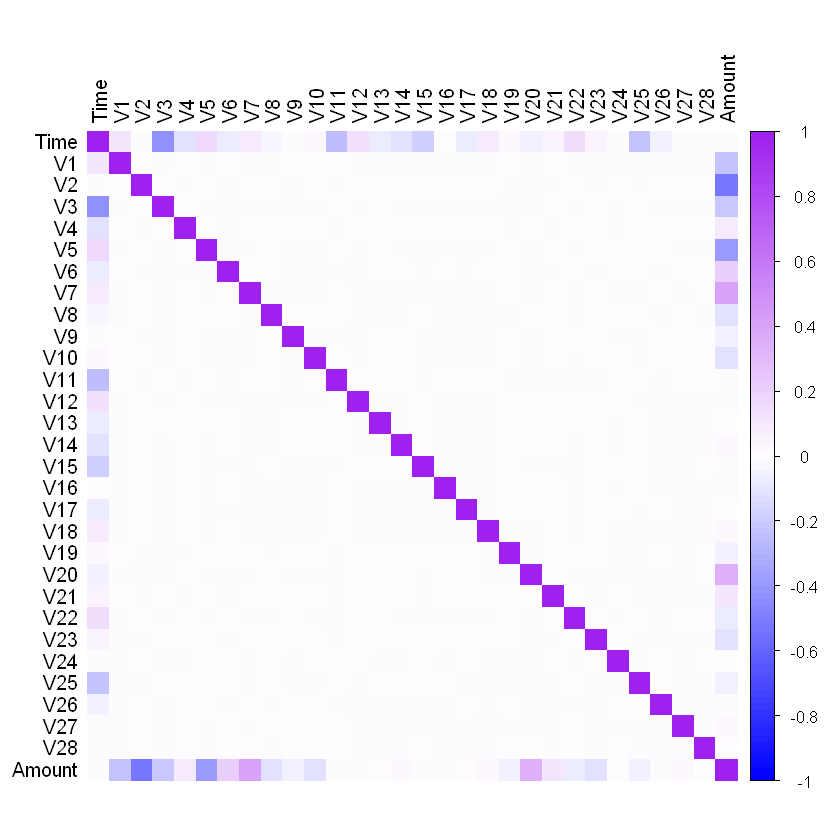

In [9]:
# Plot the correlation matrix using corrplot
corrplot(correlation_matrix, method = "color",col = colorRampPalette(c("blue", "white", "purple"))(100),tl.col = "black")

# Train-Test Split

In [10]:
set.seed(1234)
index<-createDataPartition(data$Class,p=0.8,list=FALSE)
train<-data[index,]
test<-data[-index,]

In [11]:
table(train$Class)


     0      1 
226603    379 

In [12]:
table(test$Class)


    0     1 
56650    94 

# Base Logistic Model

In [13]:
# Setting seed for reproducibility
set.seed(123)

# Createing base model to to get initial idea 
BaseModel <- glm(Class~., data=train, family = "binomial")

# get the summary of base model
summary(BaseModel)

# Plotting the base model
#par(mfrow = c(2,2))
#plot(BaseModel)


Call:
glm(formula = Class ~ ., family = "binomial", data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.468e+00  2.840e-01 -29.821  < 2e-16 ***
Time        -3.652e-06  2.561e-06  -1.426  0.15381    
V1           2.228e-01  9.474e-02   2.352  0.01869 *  
V2          -1.145e-02  1.064e-01  -0.108  0.91436    
V3          -4.436e-02  9.248e-02  -0.480  0.63151    
V4           8.847e-01  1.106e-01   7.996 1.29e-15 ***
V5           1.767e-01  1.007e-01   1.753  0.07952 .  
V6          -1.527e-01  1.116e-01  -1.368  0.17138    
V7          -1.582e-01  9.223e-02  -1.715  0.08638 .  
V8          -2.352e-01  4.183e-02  -5.623 1.88e-08 ***
V9          -2.752e-01  1.307e-01  -2.105  0.03530 *  
V10         -7.141e-01  1.184e-01  -6.034 1.60e-09 ***
V11         -7.083e-02  9.476e-02  -0.748  0.45475    
V12          3.725e-02  9.521e-02   0.391  0.69559    
V13         -3.707e-01  9.301e-02  -3.986 6.73e-05 ***
V14         -6.403e-01  6.905e-02  -9.

In [38]:
print(car::vif(BaseModel))

     Time        V1        V2        V3        V4        V5        V6        V7 
 1.943600  6.755577 11.568200  8.189338  3.473938 10.453238  4.983152 11.933333 
       V8        V9       V10       V11       V12       V13       V14       V15 
 3.196297  3.975016  7.657634  3.185104  5.720809  1.208109  5.125277  1.345244 
      V16       V17       V18       V19       V20       V21       V22       V23 
 8.410921  9.026405  6.113594  2.326184  7.814328  3.370346  3.619434  2.196359 
      V24       V25       V26       V27       V28    Amount 
 1.395122  1.860838  1.377743  4.189488  1.331894 24.754630 


P-value Analysis:
- The variables *Time, V2, V3, V5, V6, V7, V11, V12, V15, V16, V17, V18, V19, V23, V24, V25 and V26* show p-value more than threshold (>0.05).
- Removing the variables without asterix in the model summary and VIF analysis.

## Improvement 1 

In [15]:
# creating the improved model that removes insignifcant variables from the previous model.
ImprovedModel1 <- glm(Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - V12 - V15 
                                - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26,
                                  data = train, family='binomial')

# summary of improved model 1
summary(ImprovedModel1)

# Plotting the improved model 1
#par(mfrow = c(2,2))
#plot(ImprovedModel1)


Call:
glm(formula = Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26, 
    family = "binomial", data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.7932413  0.1547814 -56.811  < 2e-16 ***
V1           0.0604107  0.0564371   1.070 0.284436    
V4           0.9679899  0.0952319  10.165  < 2e-16 ***
V8          -0.2053318  0.0232197  -8.843  < 2e-16 ***
V9          -0.0394636  0.0999030  -0.395 0.692829    
V10         -0.8568603  0.0971535  -8.820  < 2e-16 ***
V13         -0.3645638  0.0873410  -4.174 2.99e-05 ***
V14         -0.6185377  0.0564575 -10.956  < 2e-16 ***
V20         -0.1733631  0.0466991  -3.712 0.000205 ***
V21          0.3343615  0.0363658   9.194  < 2e-16 ***
V22          0.5565970  0.0941543   5.912 3.39e-09 ***
V27         -0.3053960  0.0516452  -5.913 3.35e-09 ***
V28         -0.1262212  0.0460506  -2.741 0.006127 ** 
Amount      -0.0002691  0.0001266  -2.12

In [39]:
print(car::vif(ImprovedModel1))

      V1       V4       V8       V9      V10      V13      V14      V20 
2.614915 2.661608 1.256547 2.426121 5.352173 1.180673 3.646274 3.146950 
     V21      V22      V27      V28   Amount 
2.437473 2.595980 3.906698 1.574583 1.915341 


P-value Analysis:
- The variables *V1 and V9* show p-value more than threshold (>0.05).
- Removing the variables without asterix in the model summary.

## Improvement 2 : Final Base Model

In [17]:
# creating the improved model that removes insignifcant variables from the previous model.
FinalBaseModel <- glm(Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - V12 - V15 
                                - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26
                                - V1 - V9,
                                  data = train, family='binomial')
# summary of final model
summary(FinalBaseModel)


Call:
glm(formula = Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26 - 
    V1 - V9, family = "binomial", data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.7847845  0.1507002 -58.293  < 2e-16 ***
V4           0.9305036  0.0760066  12.242  < 2e-16 ***
V8          -0.2091600  0.0223162  -9.373  < 2e-16 ***
V10         -0.7905986  0.0693336 -11.403  < 2e-16 ***
V13         -0.3708880  0.0872163  -4.253 2.11e-05 ***
V14         -0.6564674  0.0457882 -14.337  < 2e-16 ***
V20         -0.1419806  0.0361891  -3.923 8.73e-05 ***
V21          0.3320692  0.0357508   9.288  < 2e-16 ***
V22          0.5808776  0.0907169   6.403 1.52e-10 ***
V27         -0.2691851  0.0410424  -6.559 5.43e-11 ***
V28         -0.1179730  0.0401097  -2.941  0.00327 ** 
Amount      -0.0003012  0.0001222  -2.464  0.01374 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion param

In [18]:
# Plotting the final model
#par(mfrow = c(2,2))
#plot(FinalBaseModel)

In [40]:
print(car::vif(FinalBaseModel))

      V4       V8      V10      V13      V14      V20      V21      V22 
1.763016 1.245904 2.802910 1.188846 2.398981 1.989944 2.519203 2.534370 
     V27      V28   Amount 
2.458193 1.410825 1.667792 


FinalBaseModel has all significant features and stable VIFs.

## Evaluation 

In [20]:
# getting the predictions from the final base model
pred <- predict(FinalBaseModel,test, type="response")

# Setting threshold for binary classification
pred <- as.integer(pred>0.5)

# Printing confusion Matrix and evaluation of the model
cat('Evaluation of Final Base Model:\n')
confusionMatrix(as.factor(pred),test$Class)

Evaluation of Final Base Model:


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56637    45
         1    13    49
                                          
               Accuracy : 0.999           
                 95% CI : (0.9987, 0.9992)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : 4.379e-05       
                                          
                  Kappa : 0.6277          
                                          
 Mcnemar's Test P-Value : 4.691e-05       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.5213          
         Pos Pred Value : 0.9992          
         Neg Pred Value : 0.7903          
             Prevalence : 0.9983          
         Detection Rate : 0.9981          
   Detection Prevalence : 0.9989          
      Balanced Accuracy : 0.7605          
                                          
       'Positive' Class : 0               
                  

Interpretation:
- if we look at the specificity rate. it is about **52.13%** indicating that the model poorly predict the fraudulent cards which is the most important class label that we want to predict correctly.
- Balanced Accuracy is **76.05%**
- Hence, we need to handle the class Imbalance.

# Under sampling the training set

in contrast to the above method, this one decreases the size of the majority class to be the same or closer to the minority class size by just taking out a random sample.

## Creating under sampled data


  0   1 
379 379 

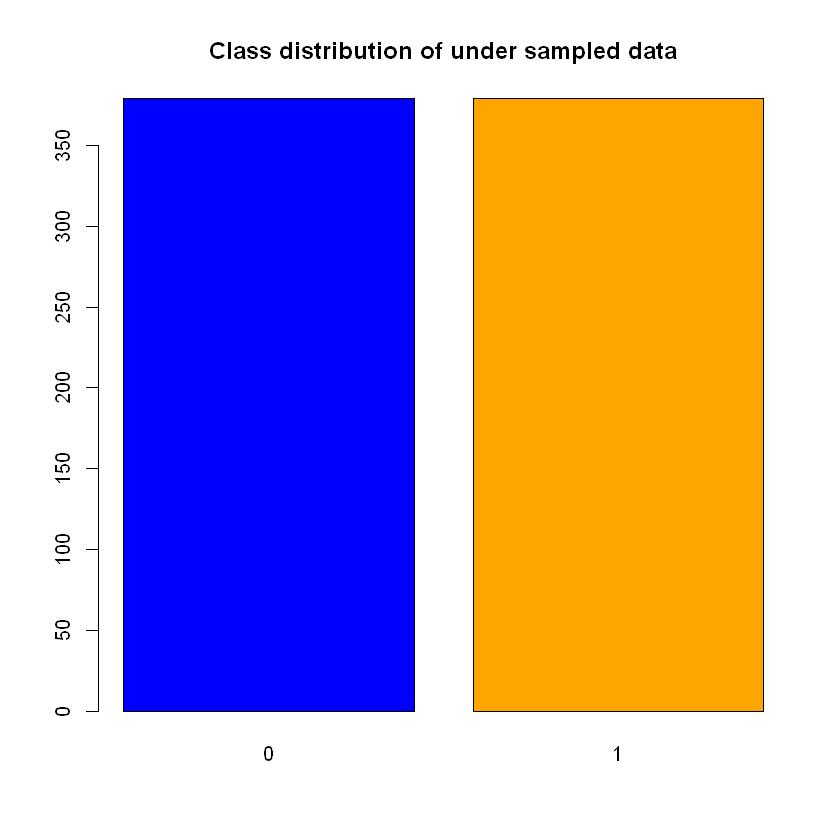

In [21]:
# Setting seed for reproducibility
set.seed(54)

# Creating trainunder data by under-sampling the majority class 
trainunder<-downSample(x=train[,-ncol(train)],
                  y=train$Class)

# To see the class distribution after under-sampling
table(trainunder$Class)

# plot the class distribution
plot(trainunder$Class, main='Class distribution of under sampled data', col=c('blue', 'orange'))

# Statistical Justification of Under Sampling

In [22]:
legit <- train[train$Class == 0, ]
fraud <- train[train$Class == 1, ]

In [23]:
cat("Legit shape: ", nrow(legit), "rows,", ncol(legit), "columns\n")
cat("Fraud shape: ", nrow(fraud), "rows,", ncol(fraud), "columns\n")

Legit shape:  226603 rows, 31 columns
Fraud shape:  379 rows, 31 columns


In [24]:
summary(legit$Amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     5.7    22.0    88.9    77.9 25691.2 

In [25]:
summary(fraud$Amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    9.13  107.16   99.99 2125.87 

In [26]:
# Using aggregate to calculate mean for each column grouped by 'Class'
mean_by_class <- aggregate(. ~ Class, data = train, FUN = mean)
mean_by_class

Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,94834.55,0.007001008,-0.008353981,0.007661176,-0.007216458,0.004607641,0.001898527,0.008277514,-0.0003253694,⋯,0.0009270047,-0.001594358,-7.615689e-05,-0.0006476496,0.002270226,-3.331685e-05,-0.001238141,0.003626107,0.0004134617,88.90266
1,80407.87,-2.242162308,2.102071508,-4.450735509,3.140026284,-2.097308978,-1.127132419,-4.230636981,0.8182533522,⋯,0.5063469341,0.692486534,8.761194e-02,-0.1749936490,-0.161116834,7.352219e-02,0.065837632,0.554333202,0.3010684510,107.16369


In [27]:
# Using aggregate to calculate mean for each column grouped by 'Class'
mean_by_class_under <- aggregate(. ~ Class, data = trainunder, FUN = mean)
mean_by_class_under

Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,⋯,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,94914.12,0.020469,0.00384579,0.05410225,-0.03033109,-0.003606505,-0.007743007,0.03445099,-0.00132401,⋯,0.01811972,-0.01220921,0.03232515,-0.02033653,0.004750908,0.04115100,-0.03448381,-0.00292836,-0.003023111,85.16071
1,80407.87,-2.242162,2.10207151,-4.45073551,3.14002628,-2.097308978,-1.127132419,-4.23063698,0.81825335,⋯,0.50634693,0.69248653,0.08761194,-0.17499365,-0.161116834,0.07352219,0.06583763,0.55433320,0.301068451,107.16369


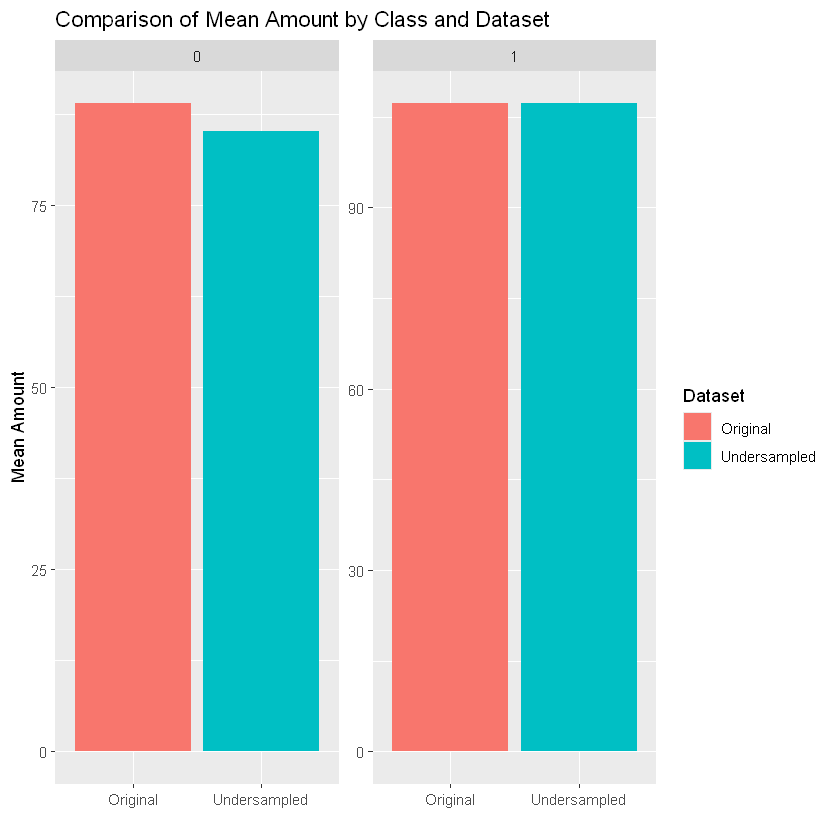

In [28]:
# Combine both sets of means for easier comparison, focusing only on the 'Amount' column
combined_means <- bind_rows(
  mutate(mean_by_class[, c("Class", "Amount")], Dataset = "Original"),
  mutate(mean_by_class_under[, c("Class", "Amount")], Dataset = "Undersampled")
)

# Plot the results focusing on 'Amount'
ggplot(combined_means, aes(x = Dataset, y = Amount, fill = Dataset)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~Class, scales = "free") +  # One plot per class
  #theme_minimal() +
  labs(title = "Comparison of Mean Amount by Class and Dataset",
       y = "Mean Amount",
       x = "")

Statistical Analysis:
- **Class 0 (Legitimate Transactions)**:
In the original dataset, the mean Amount for legitimate transactions is approximately 88.90. After undersampling, this value slightly decreased to around 85.16. This minor change suggests that the key financial characteristic (Amount) of legitimate transactions is largely preserved despite the reduction in sample size.
The slight differences observed in other features (like V1 to V28) between the original and undersampled datasets for Class 0 are mostly marginal, indicating that the general profile of legitimate transactions is maintained.
- **Class 1 (Fraudulent Transactions)**:
The mean values for fraudulent transactions remain consistent between the original and undersampled datasets. For instance, the mean Amount remains exactly the same at 107.16. This consistency is critical as it indicates that the undersampling has not altered the fundamental characteristics of fraudulent transactions.
The values for other features related to fraudulent transactions (e.g., V1 to V28) also show no variation, underscoring the ability of undersampling to retain the integrity of over-represented class characteristics even when the dataset size is reduced.

Conclusion:
- The comparison of mean values between the original and undersampled datasets suggests that undersampling is a viable method for balancing class distribution without significant loss of information. For both classes, the means of critical features, particularly the amount of the transaction, show minimal to no variation, affirming that the statistical properties essential for further analysis or model training are preserved. This outcome supports the use of undersampling as a technique in scenarios where class imbalance could otherwise skew the performance of predictive modeling, especially in fraud detection contexts where preserving the characteristics of the minority class is crucial.

Implications:
- The effectiveness of undersampling in this context allows for more balanced data handling and potentially improves the performance of machine learning models by addressing class imbalance. It ensures that the models are not biased toward the majority class and can detect patterns in the minority class (fraudulent transactions) more effectively.

## Under Sampled Model

In [29]:
# Setting seed for reproducibility
set.seed(123)

# Creating model with significant variables using under-sampled-train-data
underSampleModel <- glm(Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - V12 - V15 
                                 - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26
                                 - V1 - V9,
                                   data = trainunder, family='binomial')

# summary of under-sampled model
summary(underSampleModel)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26 - 
    V1 - V9, family = "binomial", data = trainunder)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.816228   0.355734 -10.728  < 2e-16 ***
V4           1.711166   0.234598   7.294 3.01e-13 ***
V8          -0.587003   0.149910  -3.916 9.01e-05 ***
V10         -0.585148   0.208557  -2.806  0.00502 ** 
V13         -0.444032   0.212248  -2.092  0.03643 *  
V14         -1.062142   0.183559  -5.786 7.19e-09 ***
V20         -0.662330   0.287769  -2.302  0.02136 *  
V21         -0.185670   0.155694  -1.193  0.23305    
V22          0.064231   0.212883   0.302  0.76287    
V27          0.270889   0.198410   1.365  0.17216    
V28          0.271912   0.210689   1.291  0.19685    
Amount       0.002555   0.001004   2.545  0.01094 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for

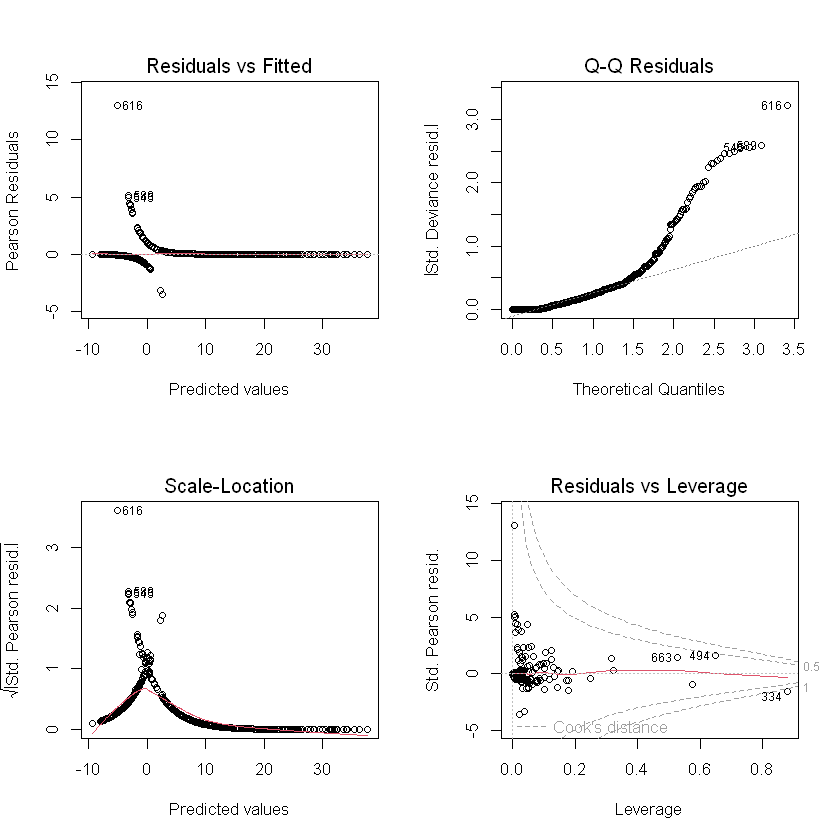

In [35]:
# Plotting the under-sampled model
par(mfrow = c(2,2))
plot(underSampleModel)

# Improvement 1: Outliear Removal 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - 
    V12 - V15 - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26 - 
    V1 - V9 - V21 - V22 - V27 - V28, family = "binomial", data = trainunder_clean)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.9808089  0.3783963 -10.520  < 2e-16 ***
V4           1.7329358  0.2475328   7.001 2.54e-12 ***
V8          -0.5523384  0.1646186  -3.355 0.000793 ***
V10         -0.6260756  0.2535500  -2.469 0.013540 *  
V13         -0.6278952  0.2245659  -2.796 0.005173 ** 
V14         -1.0912531  0.2063149  -5.289 1.23e-07 ***
V20         -0.3832951  0.2516094  -1.523 0.127665    
Amount       0.0016761  0.0009421   1.779 0.075221 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1046.64  on 754  degrees of freedom
Residual deviance:  173.74  on 747  degrees of freedom
AIC: 189.74

Number of Fisher Scor

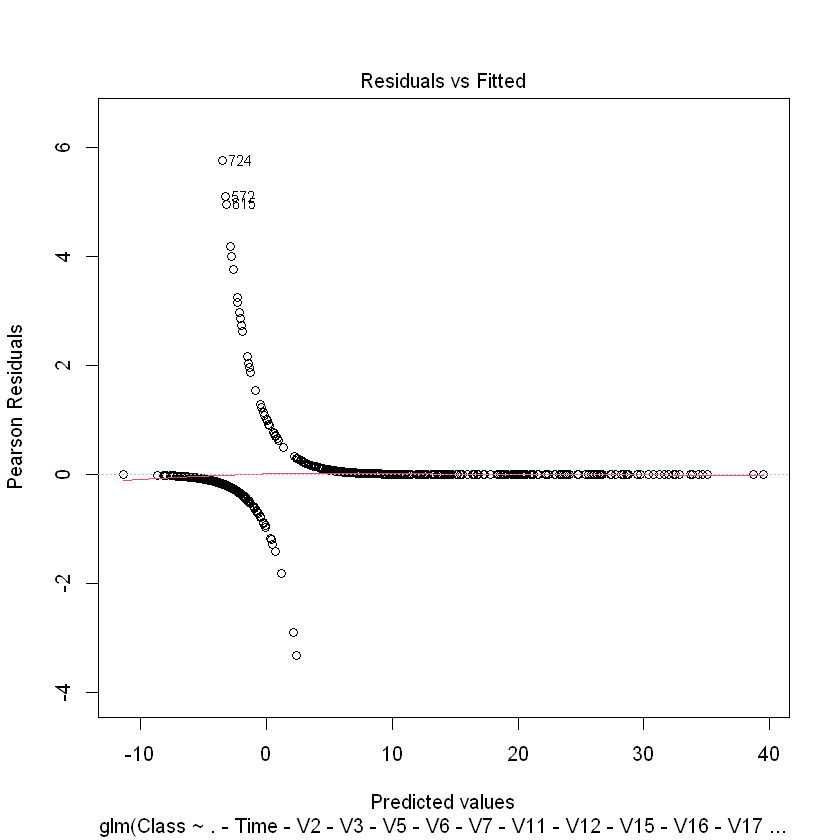

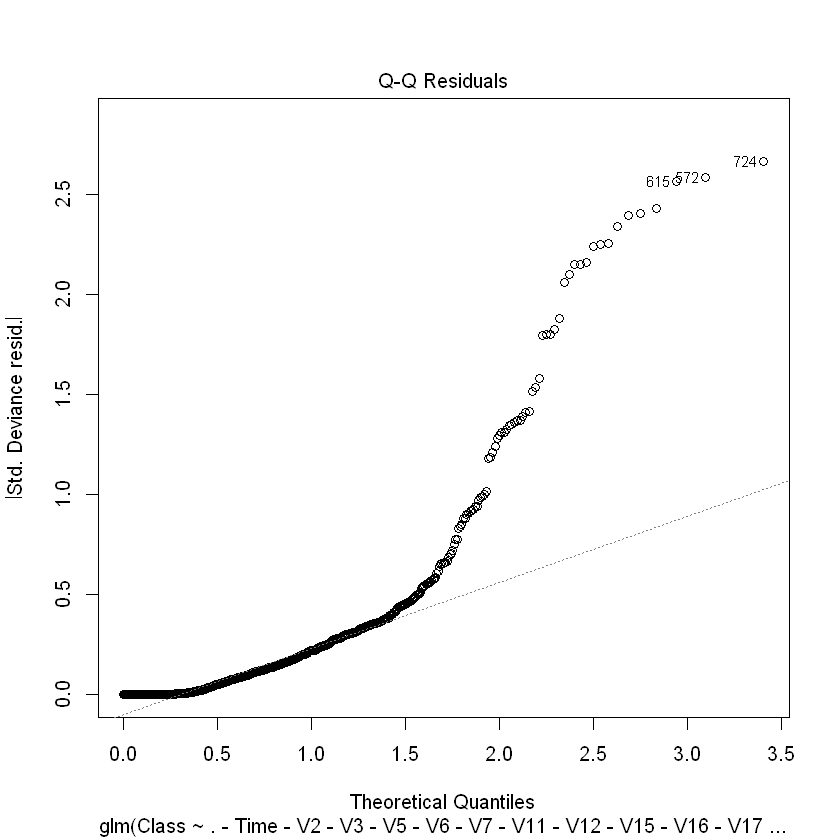

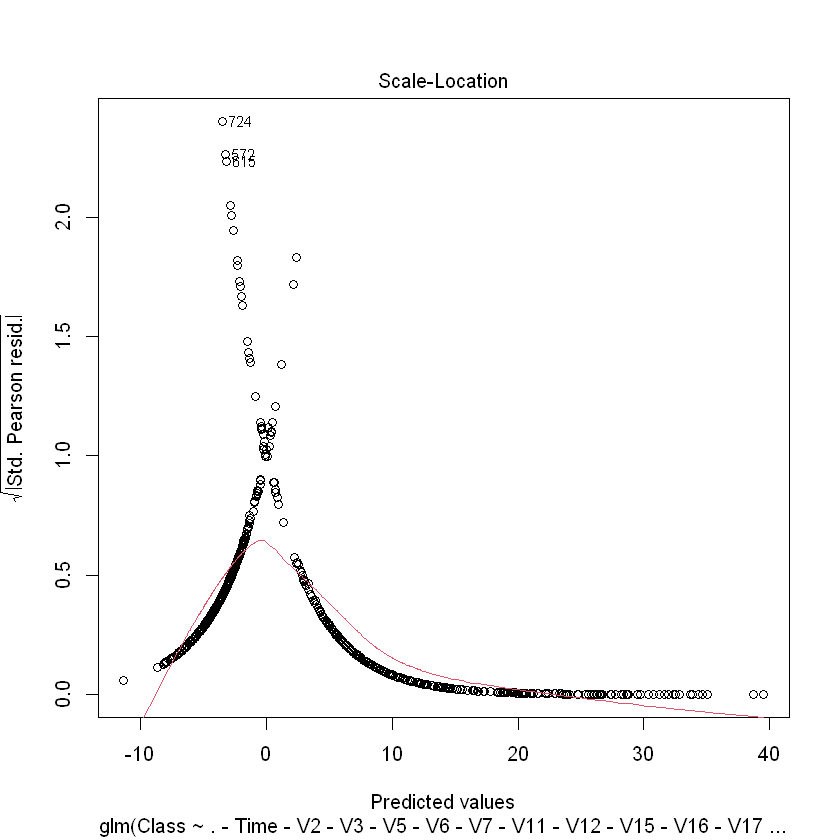

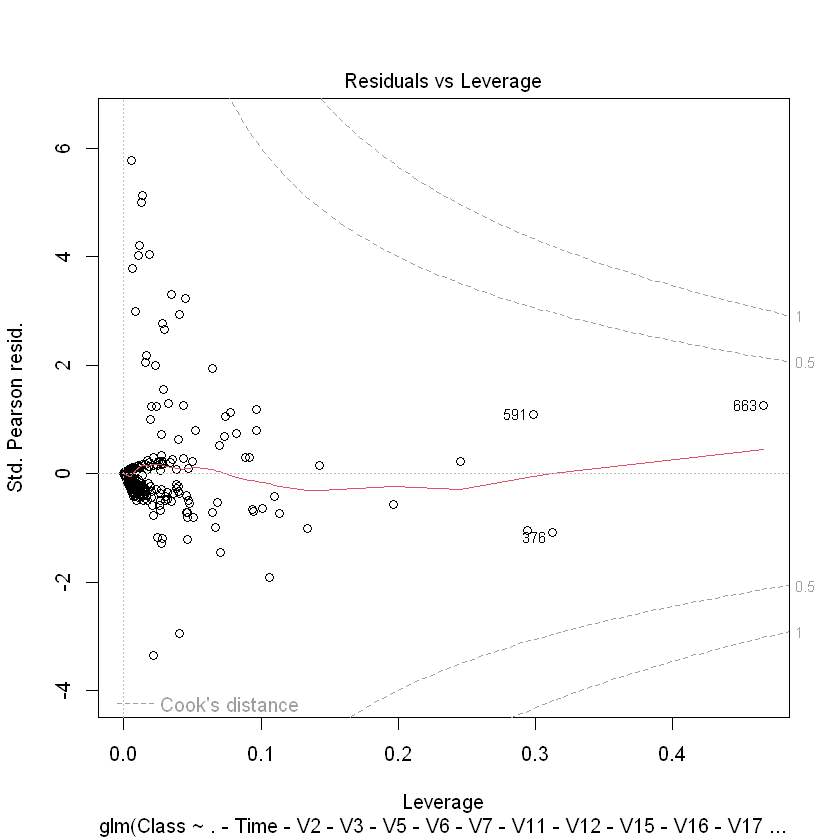

In [31]:
# Setting seed for reproducibility
set.seed(123)

# Removing the outlier
trainunder_clean <- trainunder[-c(616, 545, 589), ]

# Creating the model again with the cleaned data
underSampleModel_clean <- glm(Class ~ . - Time - V2 - V3 - V5 - V6 - V7 - V11 - V12 - V15 
                                      - V16 - V17 - V18 - V19 - V23 - V24 - V25 - V26
                                      - V1 - V9 - V21 - V22 - V27 - V28 ,
                              data = trainunder_clean, family = 'binomial')

# Summary of the new model without the outlier
summary(underSampleModel_clean)

# Plotting the new model diagnostics
#par(mfrow = c(2, 2))
plot(underSampleModel_clean)


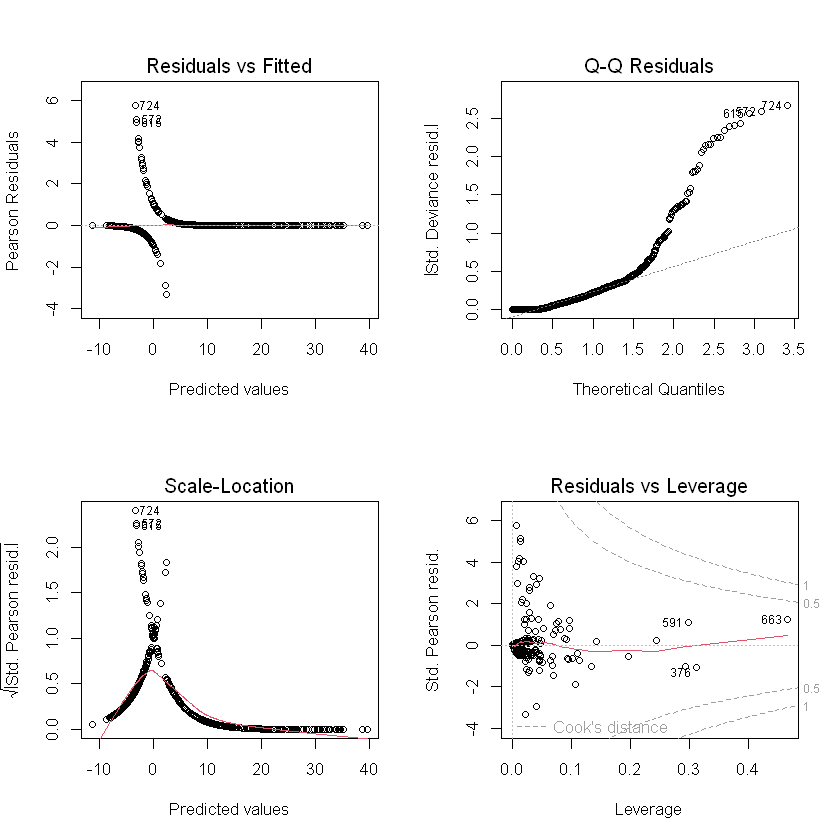

In [36]:
# Plotting the new model diagnostics
par(mfrow = c(2, 2))
plot(underSampleModel_clean)

## Evaluation

In [37]:
# getting the predictions from the under-sampled model
pred_under <- predict(underSampleModel_clean,test, type="response")

# Setting threshold for binary classification
pred_under <- as.integer(pred_under>0.5)

# Printing confusion Matrix and evaluation of the under-sampled model
cat('Evaluation of under-Sampled clean Model:\n')
confusionMatrix(as.factor(pred_under),test$Class, mode = 'everything')

Evaluation of under-Sampled clean Model:


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 54387    13
         1  2263    81
                                          
               Accuracy : 0.9599          
                 95% CI : (0.9582, 0.9615)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0635          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.96005         
            Specificity : 0.86170         
         Pos Pred Value : 0.99976         
         Neg Pred Value : 0.03456         
              Precision : 0.99976         
                 Recall : 0.96005         
                     F1 : 0.97950         
             Prevalence : 0.99834         
         Detection Rate : 0.95846         
   Detection Prevalence : 0.95869         
      Balanced Acc

In [33]:
car::vif(underSampleModel_clean)

V4       V8      V10      V13      V14      V20   Amount 
1.595188 1.231755 1.932735 1.118643 1.519374 2.290399 1.928137

Interpretation:
- we get approximately specificity rate **86.17 %** with a balanced accuracy rate **91.08%**, and the sensitivity rate has decreased to **95.99%** since we have decreased the majority class size by undersampling.

# Evaluation On Entire Data

In [34]:
# getting the predictions from the under-sampled model
pred_all <- predict(underSampleModel_clean,data, type="response")

# Setting threshold for binary classification
pred_all <- as.integer(pred_all>0.5)

# Printing confusion Matrix and evaluation of the under-sampled model
cat('Evaluation of under-Sampled clean Model on Entire Data:\n')
confusionMatrix(as.factor(pred_all),data$Class, mode = 'everything')

Evaluation of under-Sampled clean Model on Entire Data:


Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 271896     41
         1  11357    432
                                          
               Accuracy : 0.9598          
                 95% CI : (0.9591, 0.9605)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0675          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.95991         
            Specificity : 0.91332         
         Pos Pred Value : 0.99985         
         Neg Pred Value : 0.03664         
              Precision : 0.99985         
                 Recall : 0.95991         
                     F1 : 0.97947         
             Prevalence : 0.99833         
         Detection Rate : 0.95830         
   Detection Prevalence : 0.95845         
      Balanc